In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/threads-an-instagram-app-reviews/threads_reviews.csv


In [2]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from itertools import cycle
import plotly.subplots as sp

!pip install vaderSentiment
# It is used for sentiment analysis of text which has both the polarities.

!pip install wordcloud 

# install the stopwords
import nltk
nltk.download("stopwords")

import string
import re
from nltk.corpus import stopwords
from nltk import PorterStemmer

from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv("/kaggle/input/threads-an-instagram-app-reviews/threads_reviews.csv")
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [5]:
df["source"].value_counts()
# it seems that android users download more threads 

Google Play    30270
App Store       2640
Name: source, dtype: int64

In [6]:
df["rating"].value_counts()

5    15559
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

In [7]:
df_google_play=df[df["source"]=="Google Play"]["rating"]
df_app_store=df[df["source"]=="App Store"]["rating"]

In [8]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=1,
    cols=3,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Source",
        "Google Play rating",
        "App Store rating"],
        specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
        vertical_spacing = 0.1
)

source_counts = df.source.value_counts()


source_p = go.Pie(
    labels=source_counts.index,
    values=source_counts,
    name="Source",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(source_counts))],
    legendgroup="source", # label group name together
    legendgrouptitle_text="Source",  # complete group name
)

gc = df_google_play.value_counts()

gc_pie = go.Pie(
    labels=gc.index,
    values=gc,
    name="Google Play",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(gc))],
    legendgroup="Google Play",
    legendgrouptitle_text="Google Play",
)


ios = df_app_store.value_counts()

ios_pie = go.Pie(
    labels=ios.index,
    values=ios,
    name="App Store",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(ios))],
    legendgroup="App Store",
    legendgrouptitle_text="App Store",
)

fig.add_trace(source_p, row=1, col=1)
#fig.update_xaxes(title_text="Species", row=1, col=1)
#fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(gc_pie, row=1, col=2)
#fig.update_xaxes(title_text="Island", row=1, col=2)
#fig.update_yaxes(title_text="Count", row=1, col=2)

fig.add_trace(ios_pie, row=1, col=3)
#fig.update_xaxes(title_text="Fedu", row=1, col=3)
#fig.update_yaxes(title_text="Count", row=1, col=3)

fig.update_layout(
    template="plotly",
    height=430,
)

fig.update(
    layout_title_text="Source rating characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

## Results after looking into the figure 
- There are more andriod user
#### Android characteristics 
- android user mostly give 5 rating means 50% user likes thread
- around 29% android user give 1 rating means they don't like thread 
#### Iphone characteristics 
- mostly user give 1 rating
- around 28.2% user give 5 rating 

#### 2,3,4 rating % is less 
#### mostly user give rating either 1 or 5 

<Axes: xlabel='rating', ylabel='count'>

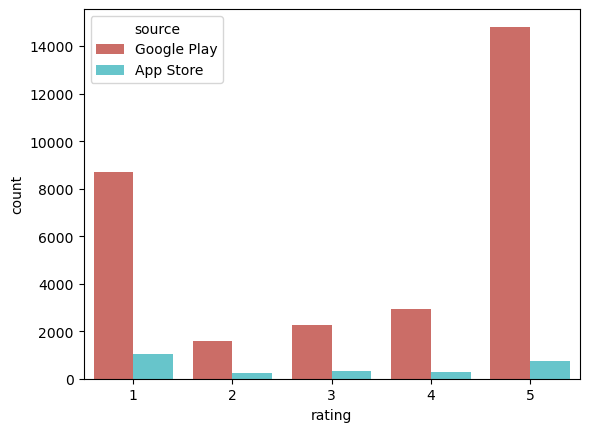

In [9]:
sns.countplot(x=df["rating"],hue=df["source"],palette='hls')

# Sentiment Analysis

**Performing the text preprocessing**

- We divide the text into tokens

- we remove the punctiuations

- we lower the text

- we remove the alphanumeric

- we remove the emojis

- we remove the stop words

- we apply stemming concept

In [10]:
def deEmojfy(inputString):
    return inputString.encode('ascii','ignore').decode('ascii')

# The above function is used to remove the emojis

In [11]:
def clean_text(text):
    ps=PorterStemmer()
    text=deEmojfy(text)  # removing emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # removing punctuations

    text_cleaned=re.sub(' +',' ',text_cleaned)  # removing white spaces
    text_cleaned=text_cleaned.lower()           # convert into lower case

    tokens=text_cleaned.split(" ")             # split into words
    STOPWORDS=stopwords.words('english')
    tokens=[token for token in tokens if token not in STOPWORDS]  # taking the words those are not stopwords

    text_cleaned=" ".join([ps.stem(token) for token in tokens])  # applying the stemming

    return text_cleaned

In [12]:
# Create a new column called cleaned_reviews
df['cleaned_reviews']=df['review_description'].apply(lambda x: clean_text(x))

In [13]:
df

,source,review_description,rating,review_date,cleaned_reviews
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh greatest experi chromebook seem custom pho...
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretti good first launch easi use selfexplanat...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,brand new app well optim howev miss quit featu...
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app lot potenti howev lot need fix examp...
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,app good need lot function exampl search topic...
...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,kill dog mark zuckerburg strangl dog gone
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,add search hashtag like twitter
32907,App Store,bad twister,1,2023-07-17 06:39:13,bad twister
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,yet anoth trash meta


#  android user comments word cloud

## for rating 1 

In [14]:
a=df[df["rating"]==1]
a1=a[a["source"]=="Google Play"]
a1

,source,review_description,rating,review_date,cleaned_reviews
6,Google Play,I still don’t want to see content from people ...,1,2023-07-19 19:35:31,still dont want see content peopl dont specif ...
12,Google Play,Pointless in following anyone. The feed algo w...,1,2023-07-14 16:15:10,pointless follow anyon feed algo wont show con...
24,Google Play,Constant crashing when trying to upload most p...,1,2023-07-09 19:04:24,constant crash tri upload photo although doesn...
28,Google Play,"As soon as I opened the app, it went good, the...",1,2023-07-06 16:13:41,soon open app went good login soon load could ...
33,Google Play,I don't normally write reviews but I'm so anno...,1,2023-07-11 21:58:36,dont normal write review im annoy app ive tri ...
...,...,...,...,...,...
30257,Google Play,👎👎👎👎👎👎👎,1,2023-07-23 11:51:55,
30259,Google Play,❤❤❤❤❤❤❤❤,1,2023-07-06 15:07:27,
30263,Google Play,🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮,1,2023-07-14 14:21:25,
30268,Google Play,🥶🥶🥶,1,2023-07-24 12:09:46,


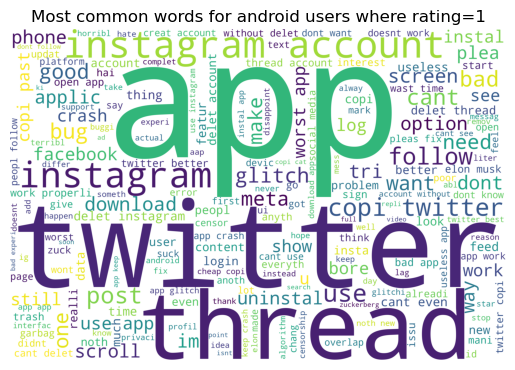

In [15]:
from wordcloud import WordCloud
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a1['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=1")
plt.axis('off')
plt.show()

## for rating 2 

In [16]:
a=df[df["rating"]==2]
a2=a[a["source"]=="Google Play"]
a2

,source,review_description,rating,review_date,cleaned_reviews
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh greatest experi chromebook seem custom pho...
5,Google Play,"Currently, it's very challenging to use. It's ...",2,2023-07-18 22:30:10,current challeng use dark mode want chang brig...
7,Google Play,Could be great if all pages loaded when you cl...,2,2023-07-06 14:35:15,could great page load click sometim dont post ...
10,Google Play,"Over all, the UI of this app is good. Using it...",2,2023-07-09 01:06:39,ui app good use easi visual clean unfortun fai...
13,Google Play,Not quite ready for prime time. Needs a feed s...,2,2023-07-06 11:53:02,quit readi prime time need feed specif account...
...,...,...,...,...,...
30161,Google Play,Cloned Twitter,2,2023-07-24 11:18:52,clone twitter
30169,Google Play,"twitter con más políticas restrictivas, buscad...",2,2023-07-08 22:11:58,twitter con ms poltica restrictiva buscador qu...
30218,Google Play,😘😘😘,2,2023-07-13 06:15:14,
30260,Google Play,❤️,2,2023-07-24 16:51:34,


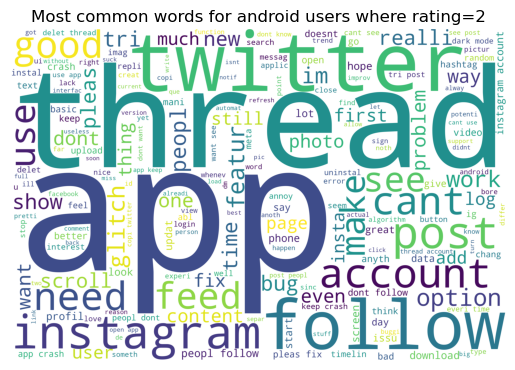

In [17]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a2['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=2")
plt.axis('off')
plt.show()

## for rating 3 

In [18]:
a=df[df["rating"]==3]
a3=a[a["source"]=="Google Play"]
a3

,source,review_description,rating,review_date,cleaned_reviews
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretti good first launch easi use selfexplanat...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,brand new app well optim howev miss quit featu...
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app lot potenti howev lot need fix examp...
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,app good need lot function exampl search topic...
8,Google Play,I'm liking the concept! There is room for impr...,3,2023-07-09 03:27:39,im like concept room improv though everytim tr...
...,...,...,...,...,...
30066,Google Play,🙄,3,2023-07-06 15:25:57,
30068,Google Play,🖤,3,2023-07-08 05:55:46,
30074,Google Play,👍,3,2023-07-06 15:06:07,
30088,Google Play,👍,3,2023-07-09 07:10:13,


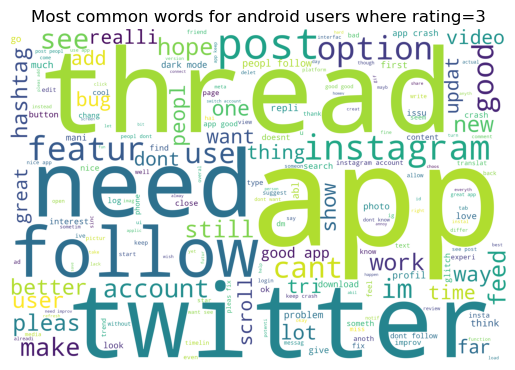

In [19]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a3['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=3")
plt.axis('off')
plt.show()

## for rating 4

In [20]:
a=df[df["rating"]==4]
a4=a[a["source"]=="Google Play"]
a4

,source,review_description,rating,review_date,cleaned_reviews
22,Google Play,It's not bad so far. A handful of unsolicited ...,4,2023-07-07 20:00:49,bad far hand unsolicit request theyr easi desp...
29,Google Play,Great App! Loved it from the very first day al...,4,2023-07-11 12:50:24,great app love first day although follow chall...
32,Google Play,It's addicting but feels cramped and messy bec...,4,2023-07-07 07:16:59,addict feel cramp messi unnecessari element li...
41,Google Play,"Yes, the app is excellent. My experience with ...",4,2023-07-06 10:38:10,ye app excel experi app fantast know new chall...
66,Google Play,I think it's a decent start. Some features I t...,4,2023-07-09 18:26:14,think decent start featur think would import g...
...,...,...,...,...,...
30173,Google Play,J4,4,2023-07-24 06:12:50,j4
30224,Google Play,👍👍👍👍,4,2023-07-06 18:36:19,
30225,Google Play,🙈🙈🙈🙈,4,2023-07-06 20:26:46,
30226,Google Play,👍👍👍👍,4,2023-07-07 08:34:33,


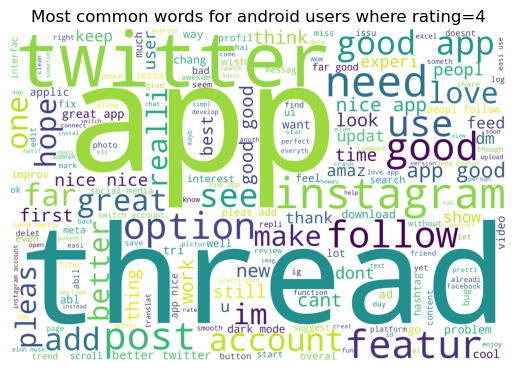

In [21]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a4['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=4")
plt.axis('off')
plt.show()

## for rating 5

In [22]:
a=df[df["rating"]==5]
a5=a[a["source"]=="Google Play"]
a5

,source,review_description,rating,review_date,cleaned_reviews
9,Google Play,Not bad! This is its first launch. There is st...,5,2023-07-06 23:41:13,bad first launch still room improv would like ...
21,Google Play,"Firstly, I want to express my appreciation for...",5,2023-07-06 18:39:12,firstli want express appreci overal concept th...
52,Google Play,The first day on the app has been really good-...,5,2023-07-06 13:13:54,first day app realli good havent notic bad bug...
94,Google Play,Off to a great start! This is a great alternat...,5,2023-07-06 17:11:26,great start great altern textbas social media ...
137,Google Play,Absolutely great. For a first version this has...,5,2023-07-06 23:15:47,absolut great first version good far keep aban...
...,...,...,...,...,...
30258,Google Play,🔥🔥🔥🔥🔥🔥🔥🔥,5,2023-07-07 05:22:55,
30261,Google Play,👍👍👍👍👍👍👍👍👍,5,2023-07-11 10:52:56,
30264,Google Play,galeng galeng,5,2023-07-06 11:57:37,galeng galeng
30265,Google Play,طرش طرش,5,2023-07-06 09:16:22,


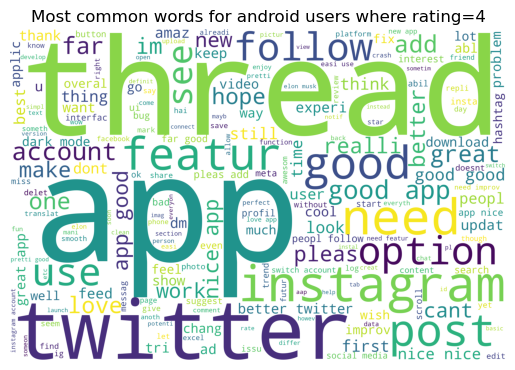

In [23]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a4['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=4")
plt.axis('off')
plt.show()

# iphone user comments wordcloud

## for rating 1

In [24]:
i=df[df["rating"]==1]
i1=i[i["source"]=="App Store"]
i1

,source,review_description,rating,review_date,cleaned_reviews
30273,App Store,Its like Twitter... only its called Threads. T...,1,2023-07-18 22:31:24,like twitter call thread immedi vibe got inten...
30274,App Store,If i could give it 0 stars I would. There are ...,1,2023-07-08 06:05:30,could give 0 star would mani issu app first co...
30287,App Store,App that was definitely just dropped because p...,1,2023-07-10 18:11:49,app definit drop peopl fuss twitter dont get w...
30291,App Store,"Twitter is better, and this app is horrible. T...",1,2023-07-23 07:56:41,twitter better app horribl thread deserv 1 sta...
30293,App Store,I was scrolling on my feed liking posts when I...,1,2023-07-06 14:06:52,scroll feed like post suddenli got ban spam de...
...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,kill dog mark zuckerburg strangl dog gone
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,add search hashtag like twitter
32907,App Store,bad twister,1,2023-07-17 06:39:13,bad twister
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,yet anoth trash meta


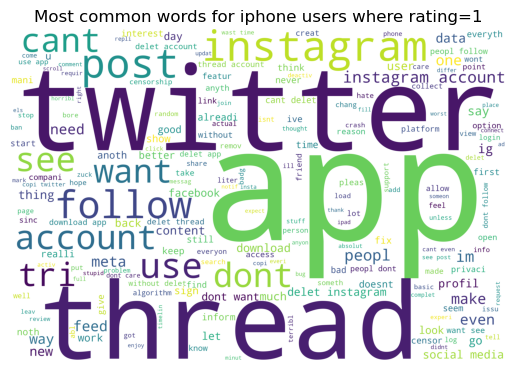

In [25]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i1['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=1")
plt.axis('off')
plt.show()

In [26]:
i=df[df["rating"]==2]
i2=i[i["source"]=="App Store"]
i2

,source,review_description,rating,review_date,cleaned_reviews
30272,App Store,I’ve been hoping for something to replace Twit...,2,2023-07-07 21:59:25,ive hope someth replac twitter facebook awhil ...
30284,App Store,"I managed to make a few posts, comments, and s...",2,2023-07-08 18:22:12,manag make post comment share start crash view...
30286,App Store,The poor performance of the service was the wo...,2,2023-07-10 16:52:07,poor perform servic worst part overal take way...
30294,App Store,"Briefly speaking, this app is decent overall, ...",2,2023-07-15 00:49:16,briefli speak app decent overal need updat lik...
30309,App Store,99% of my feed is from people I’m not followin...,2,2023-07-08 03:12:46,99 feed peopl im follow forc lot big celebr co...
...,...,...,...,...,...
32834,App Store,Suppression of Free Speech. What a Orwellian w...,2,2023-07-08 12:43:05,suppress free speech orwellian work live
32842,App Store,i need to see post of people i follow not rand...,2,2023-07-05 23:35:54,need see post peopl follow randomli post\nplea...
32878,App Store,Please make an iPadOS specific version,2,2023-07-17 01:36:58,pleas make ipado specif version
32880,App Store,Worst app ever created,2,2023-07-07 03:34:21,worst app ever creat


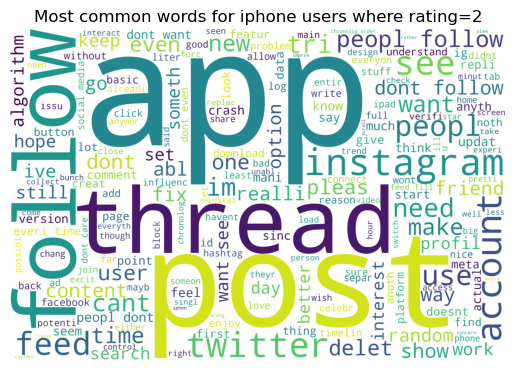

In [27]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i2['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=2")
plt.axis('off')
plt.show()

## for rating 3

In [28]:
i=df[df["rating"]==3]
i3=i[i["source"]=="App Store"]
i3

,source,review_description,rating,review_date,cleaned_reviews
30271,App Store,"this app has an amazing feel , i really enjoy ...",3,2023-07-09 05:35:44,app amaz feel realli enjoy layout gener thing ...
30277,App Store,I will preface this by saying that I very rare...,3,2023-07-07 17:28:15,prefac say rare access social media use snapch...
30278,App Store,I enjoyed the onboarding experience of bringin...,3,2023-07-07 05:40:39,enjoy onboard experi bring instagram follow fa...
30279,App Store,I'm rooting for a Twitter replacement but thre...,3,2023-07-08 14:39:27,im root twitter replac thread far extrem conne...
30297,App Store,"Zuck, my boy…if we’re gonna rake in the legal ...",3,2023-07-08 07:38:58,zuck boyif gonna rake legal troubl mimick grab...
...,...,...,...,...,...
32857,App Store,Please add arabic language .,3,2023-07-07 01:20:37,pleas add arab languag
32862,App Store,Add gyphy - to reply 🙏 love new apps!,3,2023-07-06 04:16:35,add gyphi repli love new app
32864,App Store,i really just wanna say anything i want,3,2023-07-08 23:46:27,realli wanna say anyth want
32870,App Store,Threads is Twitter without a soul. It’s not tr...,3,2023-07-06 05:50:41,thread twitter without soul truli free speech


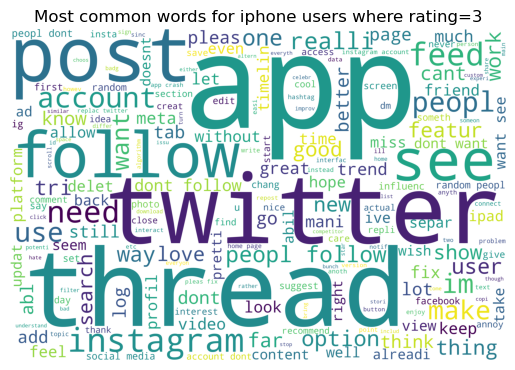

In [29]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i3['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=3")
plt.axis('off')
plt.show()

# for rating 4

In [30]:
i=df[df["rating"]==4]
i4=i[i["source"]=="App Store"]
i4

,source,review_description,rating,review_date,cleaned_reviews
30270,App Store,"Hello, I am DPM DJ. I’d like to write a somewh...",4,2023-07-07 15:58:59,hello dpm dj id like write somewhat seriou rev...
30275,App Store,Downloaded yesterday and I’m enjoying it for w...,4,2023-07-07 14:36:02,download yesterday im enjoy far signup super e...
30276,App Store,I expect the posts on my feed to be from only ...,4,2023-07-10 20:17:51,expect post feed page follow get addit post po...
30280,App Store,Threads is already a hugely better app than th...,4,2023-07-15 04:09:03,thread alreadi huge better app dumpster fire t...
30281,App Store,"so far, i am enjoying this app. obviously ther...",4,2023-07-07 14:45:23,far enjoy app obvious featur miss want good fa...
...,...,...,...,...,...
32730,App Store,We beat twitter,4,2023-07-06 05:35:02,beat twitter
32770,App Store,"Oh l’m the first reviewer, 5 stars",4,2023-07-06 01:47:50,oh lm first review 5 star
32810,App Store,Better than Twitter!,4,2023-07-08 07:22:53,better twitter
32815,App Store,It’s a good start.,4,2023-07-13 15:31:17,good start


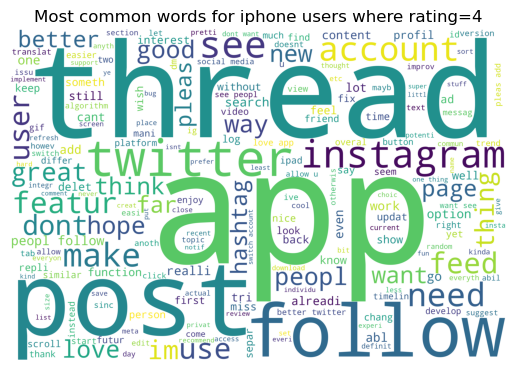

In [31]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i4['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=4")
plt.axis('off')
plt.show()

## for rating 5

In [32]:
i=df[df["rating"]==5]
i5=i[i["source"]=="App Store"]
i5

,source,review_description,rating,review_date,cleaned_reviews
30282,App Store,"Threads, an app renowned for its unique featur...",5,2023-07-06 18:52:26,thread app renown uniqu featur gain signific p...
30285,App Store,this is literally the better twitter. the comm...,5,2023-07-18 10:14:16,liter better twitter commun less toxic app who...
30289,App Store,"A real sense of community without spam, nudity...",5,2023-07-07 04:01:26,real sens commun without spam nuditi gener con...
30292,App Store,"The app is obviously in its early stages, with...",5,2023-07-07 04:27:47,app obvious earli stage miss featur like dm tr...
30303,App Store,"Firstly a playback system, maybe if I double t...",5,2023-07-07 13:26:48,firstli playback system mayb doubl tap right s...
...,...,...,...,...,...
32890,App Store,I’m done with twitter,5,2023-07-06 20:32:04,im done twitter
32892,App Store,But it’s not Twitter,5,2023-07-06 00:27:27,twitter
32899,App Store,First review!,5,2023-07-05 23:38:56,first review
32900,App Store,Meta the greatest thread #mark Z,5,2023-07-05 23:37:37,meta greatest thread mark z


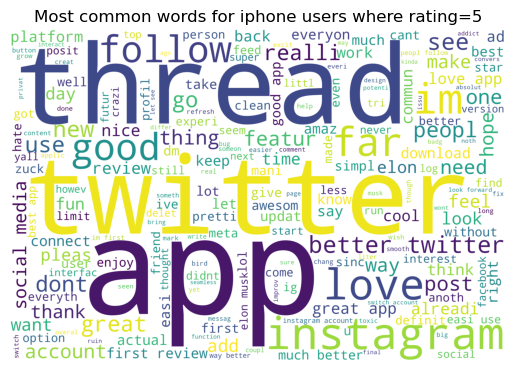

In [33]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i5['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=5")
plt.axis('off')
plt.show()



**Sentiment analysis**

- vaderSentiment

- VADER(Valance Aware Dictionary and sEntiment Reasoner)

**Polarity score**

- Polarity refers to the overall sentiment conveyed by a particular text or word

- This polarity can be expressed as a numerical rating known as a "sentiment score"

- The score can be between -100 to 100 where 0 is neutral

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [35]:
# get a polarity score
def sentiment_analyzer_scores(sentence):
    score=analyzer.polarity_scores(sentence)
    return score

In [36]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [37]:
df['sentiment_score']=df['review_description'].apply(lambda x:compound_score(x))

In [38]:
df.sample(8)

,source,review_description,rating,review_date,cleaned_reviews,sentiment_score
26679,Google Play,❤️de ka app,1,2023-07-06 08:59:34,de ka app,0.0000
24601,Google Play,No website,2,2023-07-06 04:43:48,websit,-0.2960
11,Google Play,Nice but crashed & can't access photo folders....,3,2023-07-07 12:55:32,nice crash cant access photo folder crash twic...,0.9331
4575,Google Play,Why doesn't it have a dark mode??? Needs a dar...,4,2023-07-16 17:33:25,doesnt dark mode need dark mode,0.0000
14807,Google Play,Twitter Tata bye,5,2023-07-06 20:29:29,twitter tata bye,0.0000
6813,Google Play,The app is cool and easy to use,5,2023-07-06 11:12:41,app cool easi use,0.6369
24368,Google Play,Super meta,5,2023-07-07 12:17:22,super meta,0.5994
19502,Google Play,به راحتی میشه تر زد,5,2023-07-07 00:50:32,,0.0000




Will create a function which divides reviews into three categories

- Postive score means postive review

- Negative score means negative review

- 0.00 means neutral review

In [39]:
def sentiment_category(score):
    if score>=0.05:
        return 'postive'
    elif score <= -0.05:
        return 'negative'
    else:
        return "neutral"

In [40]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [41]:
df

,source,review_description,rating,review_date,cleaned_reviews,sentiment_score,review_category
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh greatest experi chromebook seem custom pho...,-0.7117,negative
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretti good first launch easi use selfexplanat...,0.9902,postive
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,brand new app well optim howev miss quit featu...,0.9076,postive
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app lot potenti howev lot need fix examp...,0.5057,postive
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,app good need lot function exampl search topic...,0.8860,postive
...,...,...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,kill dog mark zuckerburg strangl dog gone,-0.8402,negative
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,add search hashtag like twitter,0.4199,postive
32907,App Store,bad twister,1,2023-07-17 06:39:13,bad twister,-0.5423,negative
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,yet anoth trash meta,0.0000,neutral


<Axes: xlabel='review_category', ylabel='count'>

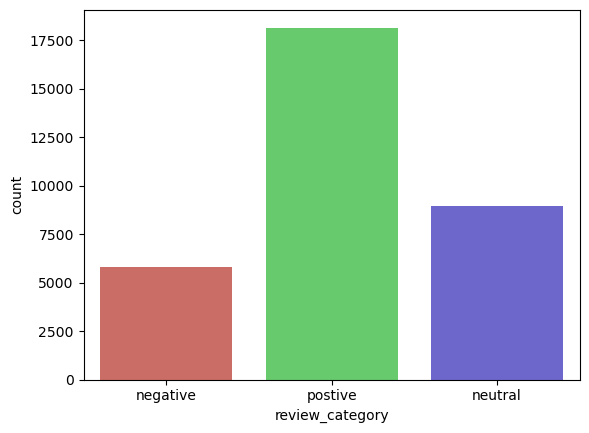

In [42]:
sns.countplot(x='review_category',data=df,palette='hls')

**Positive score** is high means mostly people like threads 

# Conclusion

### Why users are giving 1 rating 

1. Mark Zuckerburg wasted a lot of money in copy paste work(**clone of Twitter**).
2. Constant crashing when trying to **upload post**. We love Twitter.
3. **UI overlays** on top of each other which makes reading anything is Impossible.
4. constantly says **'Sorry, something went wrong. Try Again'**. This is frustrating.
5. The data collection on this app is SINISTER can use it commercially.
6. Very dangerous for **user security** (Absolute disaster 😑).
7. The application needs a lot of development. Looks like it's a **launch without trial**.
8. Downloaded and deleted within 5 minutes. It’s a **political echo chamber** for people who people who left Twitter.
9. **Junk news** on every site, showing 99% post from accounts that I didn't follow.
10. can't register without having instagram account and can't delete without deleting entire instagram.**It's a trap**!

### Why users are giving 5 rating 

1. Great...**no subscription** or limitations problem.
2. I love threading. Its so refreshing.
3. If you can't find your favorite creator they will be in a **pending box** and once they downloaded it, it will automatically make you followed.
4. Great app and a great competitor, Far better than Twitter(Evidently a rushed app to **fill the gap left by twitter**).
5. This is very similar to the bird app, but without the **rampant toxicity**.
6. **no ads** yet, which is why I gets 5 stars.
7. **Great app with lots of potential**. The app's social features are also fantastic. I can connect with friends who are also using Thread's, create groups, and even send direct invites to plan lunch dates. It's a great way to stay connected and coordinate lunch outings with ease.
8. "**Love the app** ... One thing I would like is the volume on the videos being easier to select as on .. and once it's on for one, stays on for all until I turn it off.
9. The user interface is super easy to learn and get used to. Plus, the features are superb.
10. Mostly belives in meta, they think 'Not bad! This is its first launch. There is still room for improvements...Upgraded to 5 star cause meta team heard my complaint as soon as I reported it.

## What types of updates user are asking 

 **I would like to see a**
* trending page
* longer videos
* an edit button for any threads(posts) uploaded by the user(Edit Feature).
* Add a pause button(and slow motion controls for videos).
* Following list
* Hashtags,  means if we wanna trend something we gotta use that.
* Functional Search button
* to save picture like Twitter
* Needs iPad or tablet or web desktop support
* no more crashing problem 
* translation option 
* option to delete threads without deleting instagram.
*  Etc.....................

# One question, which one will win Blue Bird or threads in future?
 I can't believe Mark Zuckerberg and Elon Musk are fighting for a app like this

## Tell your answers in comments